In [1]:
import math
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits import mplot3d
from mpl_toolkits.mplot3d.art3d import Poly3DCollection, Line3DCollection

In [2]:
#Koordinate tacaka sa leve slike
#nevidljive tacke: 7 i 15


#piramida
x1=np.array([158,610,1])
x2=np.array([173,539,1])
x3=np.array([98,568,1])
x4=np.array([129,553,1])
#kutija od cipela
x5=np.array([296,618,1])
x6=np.array([461,481,1])
#x7
x8=np.array([87,402,1])
x9=np.array([294,544,1])
x10=np.array([471,396,1])
x11=np.array([227,254,1])
x12=np.array([70,330,1])
#kutija od sijalice
x13=np.array([238,435,1])
x14=np.array([306,420,1])
#x15
x16=np.array([207,366,1])
x17=np.array([238,384,1])
x18=np.array([310,366,1])
x19=np.array([270,297,1])
x20=np.array([201,307,1])

In [3]:
#Koordinate tacaka sa desne slike
#nevidljive tacke: 7 i 16

#piramida
y1=np.array([23,627,1])
y2=np.array([129,587,1])
y3=np.array([62,531,1])
y4=np.array([61,560,1])
#kutija od cipela
y5=np.array([168,535,1])
y6=np.array([472,355,1])
#y7
y8=np.array([48,347,1])
y9=np.array([150,455,1])
y10=np.array([500,264,1])
y11=np.array([339,170,1])
y12=np.array([30,285,1])
#kutija od sijalice
y13=np.array([205,301,1])
y14=np.array([263,329,1])
y15=np.array([338,258,1])
#y16
y17=np.array([197,237,1])
y18=np.array([261,267,1])
y19=np.array([344,199,1])
y20=np.array([282,178,1])

In [4]:
#Rekonstrukcija skrivenih tacaka
x7 = np.cross(np.cross(np.cross(np.cross(x12, x8), np.cross(x6, x10)), x11),
              np.cross(np.cross(np.cross(x11, x12), np.cross(x9, x10)), x8))
x7 = x7 / x7[2]
a7=math.floor(x7[0])
b7=math.floor(x7[1])
xp7=np.array([a7,b7,1])

#_______________________________________________

x15 = np.cross(np.cross(np.cross(np.cross(x20, x16), np.cross(x14, x18)), x19),
              np.cross(np.cross(np.cross(x19, x20), np.cross(x17, x18)), x16))
x15= x15 / x15[2]
a15=math.floor(x15[0])
b15=math.floor(x15[1])
xp15=np.array([a15,b15,1])

#_______________________________________________

y7 = np.cross(np.cross(np.cross(np.cross(y12, y8), np.cross(y6, y10)), y11),
              np.cross(np.cross(np.cross(y11, y12), np.cross(y9, y10)), y8))
y7 = y7 / y7[2]
y7.round()

c7=math.floor(y7[0])
d7=math.floor(y7[1])
yp7=np.array([c7,d7,1])

#_______________________________________________

y16 = np.cross(np.cross(np.cross(np.cross(y17, y13), np.cross(y15, y19)), y20),
              np.cross(np.cross(np.cross(y20, y19), np.cross(y18, y19)), y13))
y16 = y16 / y16[2]


c16=math.floor(y16[0])
d16=math.floor(y16[1])
yp16=np.array([c16,d16,1])


print('x7:',xp7)
print('x15:',xp15)
print('y7:',yp7)
print('y16:',yp16)

x7: [233 320   1]
x15: [269 352   1]
y7: [333 226   1]
y16: [281 244   1]


Morala sam da radim sa math.floor da bih lepo dobila ceo broj da vidite da sam lepe koordinate dobila
jer mi round iz numpy nesto nije radio
(nije pravio nikakvu razliku)
Ali za fundamentalnu matricu sam koristila obicne x7 x15 y7 i y16 

In [5]:
X=np.array([x1,x2,x3,x4,x5,x6,xp7,x8,x9,x10,x11,x12,x13,x14,x15,x16,x16,x17,x18,x19,x20])
Y=np.array([y1,y2,y3,y4,y5,y6,yp7,y8,y9,y10,y11,y12,y13,y14,y15,y16,y17,y18,y19,y20])

In [6]:
# print(X)
# print('\n',Y)

Fundamentalna matrica

In [7]:
#Fundamentalna matrica 
XX=np.array([x5,x6,x7,x8,x9,x10,x11,x12])
YY=np.array([y5,y6,y7,y8,y9,y10,y11,y12])

In [8]:
def jed(l, r):
    x1 = l[0]
    y1 = l[1]
    z1 = l[2]

    x2 = r[0]
    y2 = r[1]
    z2 = r[2]

    return np.array([x1*x2, y1*x2, z1*x2, 
                     x1*y2, y1*y2, z1*y2, 
                     x1*z2, y1*z2, z1*z2])
jed8 = []
for i in range(8):  
    jed8.append(jed(XX[i], YY[i]))

# SVD
U, S, V = LA.svd(jed8)

# FF
FF = np.zeros((3, 3))
V = V[:][-1]

for i in range(3):
    for j in range(3):
        FF[i][j] = V[3*i+j]

print("Fundamentalna matrica:")
print(FF.round(8))

Fundamentalna matrica:
[[ 3.3720000e-05 -5.2590000e-05  9.6162600e-03]
 [ 8.0970000e-05  6.3000000e-07 -7.8430560e-02]
 [-4.2826210e-02  6.9223420e-02  9.9354426e-01]]


In [9]:
# Provera da li je YY.T * FF * XX = 0
C = np.ones((8, 1))
for i in range(8):
    C[i][0] = round(YY[i].T.dot(FF).dot(XX[i]), 5)

print(LA.det(FF)) # treba da bude blizu 0

6.484448785185188e-08


In [10]:
#epipolovi
U, S, V = LA.svd(FF)

print("e1:")
e1 = V[:][-1] # treca vrsta matrice V 
print(e1)
#afine koordinate
e1 = (1/e1[2]) * e1
print('Afine koordinate e1:',e1)

print("\ne2:")
e2 = U.T[:][-1] # treca kolona matrice U (tj. treca vrsta od U.T)
print(e2)
# afine koordinate
e2 = (1/e2[2]) * e2 
print('Afine koordinate e2:',e2)

e1:
[0.85595368 0.51705178 0.00087079]
Afine koordinate e1: [982.96732063 593.77629057   1.        ]

e2:
[9.91246929e-01 1.32018338e-01 8.27534110e-04]
Afine koordinate e2: [1.19783211e+03 1.59532201e+02 1.00000000e+00]


In [11]:
S = np.array([[S[0], 0, 0],
              [0, S[1], 0],
              [0, 0, 0]])
print(S)
print("\n")

FF1 = U.dot(S).dot(V)
print(FF1)

print("\n")
print(LA.det(FF))
print(LA.det(FF1))

# det(FF1) < det(FF) pa cemo koristiti FF1
if LA.det(FF)>LA.det(FF1):
    print("\nKoristicemo FF1")

print("\n")
print("\n")


[[0.99997953 0.         0.        ]
 [0.         0.00639897 0.        ]
 [0.         0.         0.        ]]


[[ 2.51213846e-05 -5.77822882e-05  9.61625262e-03]
 [ 7.98272155e-05 -6.22802670e-08 -7.84305636e-02]
 [-4.28262126e-02  6.92234160e-02  9.93544261e-01]]


6.484448785185188e-08
2.8743909930986943e-23

Koristicemo FF1






Triangulacija

In [12]:
# Kanonska matrica kamere
T1 = np.array([[1, 0, 0, 0],
               [0, 1, 0, 0],
               [0, 0, 1, 0]])
print("T1:")
print(T1)
print("\n")


# Matrica vektorskog mnozenja kao kod Rodrigeza
E2 = np.array([[0, -e2[2], e2[1]],
               [e2[2], 0, -e2[0]],
               [-e2[1], e2[0], 0]])
print("E2:")
print(E2)
print("\n")


# Matrica druge kamere
tmp = E2.dot(FF1)
T2 = np.array([[tmp[0][0], tmp[0][1], tmp[0][2], e2[0]],
               [tmp[1][0], tmp[1][1], tmp[1][2], e2[1]],
               [tmp[2][0], tmp[2][1], tmp[2][2], e2[2]]])
print("T2:")
print(T2)
print("\n")


# Za svaku tacku dobijamo sistem od 4 jednacine sa 4 homogene nepoznate
def jednacine(l, d):
    return np.array([l[1]*T1[2] - l[2]*T1[1],
                    -l[0]*T1[2] + l[2]*T1[0],
                    d[1]*T2[2] - d[2]*T2[1],
                    -d[0]*T2[2] + d[2]*T2[0]])

# Vracamo 3D koordinate
def TriD(l, r):
    U, S, V = LA.svd(jednacine(l, r))
    P = V[-1]
    P = P / P[3]
    return P[:-1]


reconstructed = []
length=len(X)
for i in range(20): # len(X) JE 20
    reconstructed.append(TriD(X[i], Y[i]))
print("----------------------------------------------------------------------------")

# Mnozimo z koordinatu sa nekoliko stotina
tmp = np.eye(3)
tmp[2][2] = 400
reconstructed_400 = np.zeros((len(X),3))
for i in range(20): # len(X) JE 20
    reconstructed_400[i] = tmp.dot(reconstructed[i])

print(reconstructed_400)
R = reconstructed_400

T1:
[[1 0 0 0]
 [0 1 0 0]
 [0 0 1 0]]


E2:
[[ 0.00000000e+00 -1.00000000e+00  1.59532201e+02]
 [ 1.00000000e+00  0.00000000e+00 -1.19783211e+03]
 [-1.59532201e+02  1.19783211e+03  0.00000000e+00]]


T2:
[[-6.83223977e+00  1.10433640e+01  1.58580733e+02  1.19783211e+03]
 [ 5.12986377e+01 -8.29180882e+01 -1.19008960e+03  1.59532201e+02]
 [ 9.16119322e-02  9.14353432e-03 -9.54807494e+01  1.00000000e+00]]


----------------------------------------------------------------------------
[[-23.77846644 -97.3092517  -56.61748627]
 [-13.38321167 -47.02880042 -27.40019816]
 [-10.03334834 -61.65192859 -40.50363169]
 [-13.97647552 -65.96380003 -41.37047612]
 [-19.56987044 -42.11612139 -26.28086357]
 [-12.96256991 -15.74358307 -11.22373642]
 [ -7.44308397 -11.3591552  -13.16773007]
 [-12.27169146 -57.77384342 -56.94028933]
 [-22.14411833 -42.45681958 -30.18626555]
 [-12.05450149 -12.41108364 -10.45570383]
 [ -7.14798374  -8.94222256 -13.0186    ]
 [-13.65324374 -65.35618561 -78.70508778]
 [-13.88516

ISCRTAVANJE

ISCRTAVANJE

In [13]:
iviceVelika =  np.array([[5, 6], [6, 7], [7, 8], [8, 5],
                         [9, 10], [10, 11], [11, 12], [12,  9], 
                        [5, 9], [6, 10], [7, 11], [8, 12]])

iviceMala = np.array([[13, 14], [14, 15], [15, 16], [16, 13], 
                      [17, 18], [18, 19], [19, 20], [20, 17],
                      [13, 17], [14, 18], [15, 19], [16, 20]])

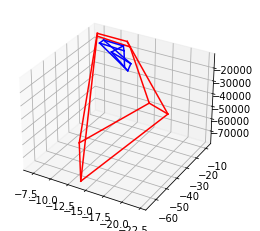

In [14]:
rekonstruisane_faktor = np.zeros((20, 3))
for i in range(20):
        rekonstruisane_faktor[i][0] = R[i][0]
        rekonstruisane_faktor[i][1] = R[i][1]
        rekonstruisane_faktor[i][2] = R[i][2]*1000
        

fig = plt.figure()
ax = plt.axes(projection='3d')

for ivica in iviceVelika:
    ax.plot3D([rekonstruisane_faktor[ivica[0] - 1][0], rekonstruisane_faktor[ivica[1] - 1][0]],
              [rekonstruisane_faktor[ivica[0] - 1][1], rekonstruisane_faktor[ivica[1] - 1][1]], 
              [rekonstruisane_faktor[ivica[0] - 1][2], rekonstruisane_faktor[ivica[1] - 1][2]], 'red')

for ivice in iviceMala:
    ax.plot3D([rekonstruisane_faktor[ivice[0] - 1][0], rekonstruisane_faktor[ivice[1] - 1][0]], 
              [rekonstruisane_faktor[ivice[0] - 1][1], rekonstruisane_faktor[ivice[1] - 1][1]], 
              [rekonstruisane_faktor[ivice[0] - 1][2], rekonstruisane_faktor[ivice[1] - 1][2]], 'blue')

plt.gca().invert_yaxis()
plt.show()